In [1]:
%load_ext autoreload
%autoreload 2

import os
os.environ['CUDA_VISIBLE_DEVICES'] = '1'

In [2]:
from diffrl.env import DifferentiablePhysicsEnv, randp

env = DifferentiablePhysicsEnv(
    #cfg_path='configs/plb3d_particle_contact.yml',
    cfg_path='configs/plb3d.yml',
    task_cfg=dict(
        TYPE="MoveObject",
        shape_metric=dict(chamfer=1., grid=0.),
        ctrl_object_id=0,
        childs=[
            dict(
                method='box',
                shape_args=randp((0.2, 0.08, 0.08)),
                center=dict(lower=(0.3, 0.4, 0.5),
                            upper=(0.0, 0.0, 0.7))
            ),
            dict(
                method='box',
                shape_args=randp((0.2, 0.08, 0.08)),
                center=dict(lower=(0.8, 0.4, 0.5),
                            upper=(0.0, 0.0, 0.7))
            ),
            dict(
                method='sphere',
                center=(0.8, 0.2, 0.5),
                shape_args=0.2
            )
        ],
        dx=randp((0.0, -0.1, 0.0)),
        rot=randp((0.9, 0.2, 0.5)),
    ),
    #task_cfg=dict(TYPE="MoveObject"),
    **{
        "manipulator_cfg.size":
        (0.05, 0.2, 0.2)
    },
)


[Taichi] mode=release
[Taichi] preparing sandbox at /tmp/taichi-y5kevpun
[Taichi] version 0.7.26, llvm 10.0.0, commit e37bdb5e, linux, python 3.7.3
[I 01/31/22 23:17:30.764 432107] [shell.py:_shell_pop_print@35] Graphical python shell detected, using wrapped sys.stdout
[Taichi] Starting on arch=cuda
E: 5000.0
dim: 3
dt_quality: 1.0
dtype: float32
dynamic_box: False
gravity: (0.0, -1.0, 0.0)
grid_size: (1.0, 1.0, 1.0)
ground_friction: 5.0
ground_height: 3.0
max_steps: 1024
muscle_stiffness: 150.0
n_particles: 20000
nu: 0.2
particle_contact: False
quality: 1.0
use_actuation: False
yield_stress: 100.0
{'width': (0.2, 0.2, 0.2), 'init_pos': (0.5, 0.1, 0.5), 'n_particles': 3000, 'color': 9868800}
Building primitive
action:
  dim: 6
  scale: (0.01, 0.01, 0.01, 0.01, 0.01, 0.01)
color: (0.8, 0.8, 0.8)
friction: 5.0
init_pos: (0.25, 0.1, 0.5)
init_rot: (1.0, 0.0, 0.0, 0.0)
lower_bound: (-1.0, -1.0, -1.0)
mass: 1.0
round: 0.01
shape: Box
size: (0.05, 0.2, 0.2)
stiffness: 0.0
upper_bound: (2.0, 

In [3]:
import numpy as np
#env.reset()
def loss(*args, **kwargs):
    return 0
env.set_loss_fn(loss)
env.execute(env.get_state(), np.zeros((50, 12)), 'an.mp4')

[W 01/31/22 23:17:59.537 432107] [type_check.cpp:visit@70] [$7153] Atomic add (i64 to i32) may lose precision, at
[W 01/31/22 23:17:59.537 432107] [type_check.cpp:visit@71] 

animating an.mp4
Moviepy - Building video an.mp4.
Moviepy - Writing video an.mp4



Moviepy - Done !
Moviepy - video ready an.mp4


start rendering goal..
start rendering goal..
start rendering goal..


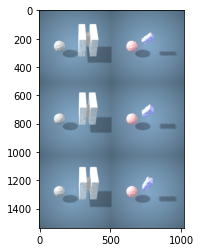

In [4]:
from tools import CN
env.task._cfg.dx = (0., 0., 0.1)
env.task.update_cfg(CN(dict(
    ctrl_object_id=0,
    shape_metric=dict(chamfer=1.,grid=0.),
    childs=[
        dict(
            method='box',
            shape_args=randp((0.08, 0.2, 0.08), (0.12, 0.23, 0.12)),
            center=(0.3, 0.4, 0.5)
        ),
        dict(
            method='sphere',
            center=(0.8, 0.2, 0.5),
            shape_args=0.1
        )
    ],
    rot=randp((0.0, 0.0, 0.3), (0., 0., 1.1)),
    #dx=randp((0.2, 0., 0.), (0.3, 0.01, 0.01)),
    dx =(0.2, 0., 0.)
)))
env.reset()
   

import matplotlib.pylab as plt
import numpy as np

images = []
for j in range(3):
    env.reset()
    img1 = env.render(mode='rgb_array')
    img2 = env.task.render_goal(mode='rgb_array')
    images.append(np.concatenate((img1, img2), axis=1))

plt.imshow(np.concatenate(images, 0))

In [5]:
print(env.task._cfg)

bg_weight: 1.0
center:
  lower: (0.5, 0.1, 0.5)
  method: uniform
  upper: None
childs: [{'method': 'box', 'shape_args': CfgNode({'lower': (0.08, 0.2, 0.08), 'upper': (0.12, 0.23, 0.12), 'method': 'uniform'}), 'center': (0.3, 0.4, 0.5)}, {'method': 'sphere', 'center': (0.8, 0.2, 0.5), 'shape_args': 0.1}]
contact_weight: 1.0
ctrl_object_id: 0
dx: (0.2, 0.0, 0.0)
method: box
n: None
object_id: None
rot:
  lower: (0.0, 0.0, 0.3)
  method: uniform
  upper: (0.0, 0.0, 1.1)
shape_args: None
shape_metric:
  center: 1.0
  chamfer: 1.0
  emd: 0.0
  grid: 0.0
shape_weight: 1.0


In [6]:

out = env.solve(env.task.reset(env, requires_grad=True),
                [env.manipulator.get_initial_action() for i in range(50)],
                render_path='tmp',
                render_interval=50,
                max_iter=1000, lr=0.01)


TypeError: reset() missing 1 required positional argument: 'requires_grad'